In [2]:
import pandas as pd

misionDB = pd.read_csv('Misi_n_TIC_2020_100_mil_programadores.csv')
columnNames = misionDB.columns



len(misionDB[misionDB['ESTADO_FORMACION']=='ASPIRANTE'])
columnNames


misionDB = misionDB[misionDB['RUTA']=='RUTA 2']


## Estrato socioeconómico de los aspirantes 

In [3]:
misionDB['ESTRATO_SOCIAL'].unique()


array(['3', '1', '2', '4', 'a', '5', '6'], dtype=object)

In [4]:
misionDB = misionDB[misionDB['ESTRATO_SOCIAL']!='a']
misionDB['ESTRATO_SOCIAL'] = misionDB['ESTRATO_SOCIAL'].astype(int)
estratos = misionDB['ESTRATO_SOCIAL'].unique()

estratos.sort()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-white')
serieEstratoAspirantes = misionDB['ESTRATO_SOCIAL']
serieEstratoMatriculados = misionDB[misionDB['ESTADO_FORMACION']=='MATRICULADO']['ESTRATO_SOCIAL']
serieEstratoGraduados = misionDB[misionDB['ESTADO_FORMACION']=='GRADUADO']['ESTRATO_SOCIAL']

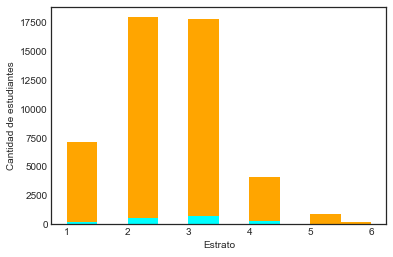

In [6]:
plt.hist(serieEstratoMatriculados, histtype='stepfilled', color="orange", label="Matriculados")
plt.hist(serieEstratoGraduados, histtype='stepfilled',color="cyan", label="Graduados")

plt.xlabel("Estrato")
plt.ylabel("Cantidad de estudiantes")

#plt.legend()
plt.show()

In [7]:
relacionMatriculadoAspiranteArray = []

for estrato in estratos:
    poblacionAspirante = len(misionDB[(misionDB['ESTADO_FORMACION']=='ASPIRANTE') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    poblacionMatriculado = len(misionDB[(misionDB['ESTADO_FORMACION']=='MATRICULADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    relacionMatriculadoAspirante = (poblacionMatriculado/poblacionAspirante)*100
    relacionMatriculadoAspiranteArray.append(relacionMatriculadoAspirante)
    print(f'Estrato {estrato} - Núm. Aspirantes: {poblacionAspirante}, Núm. Matriculados: {poblacionMatriculado}, Relación: {relacionMatriculadoAspirante:,.2f}%')


Estrato 1 - Núm. Aspirantes: 68522, Núm. Matriculados: 7104, Relación: 10.37%
Estrato 2 - Núm. Aspirantes: 116597, Núm. Matriculados: 17950, Relación: 15.39%
Estrato 3 - Núm. Aspirantes: 94559, Núm. Matriculados: 17795, Relación: 18.82%
Estrato 4 - Núm. Aspirantes: 18782, Núm. Matriculados: 4109, Relación: 21.88%
Estrato 5 - Núm. Aspirantes: 3846, Núm. Matriculados: 864, Relación: 22.46%
Estrato 6 - Núm. Aspirantes: 1059, Núm. Matriculados: 223, Relación: 21.06%


In [8]:
relacionGraduadoAspiranteArray = []

for estrato in estratos:
    poblacionAspirante = len(misionDB[(misionDB['ESTADO_FORMACION']=='ASPIRANTE') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    poblacionGraduado = len(misionDB[(misionDB['ESTADO_FORMACION']=='GRADUADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    relacionGraduadoAspirante = (poblacionGraduado/poblacionAspirante)*100
    relacionGraduadoAspiranteArray.append(relacionGraduadoAspirante)
    print(f'Estrato {estrato} - Núm. Aspirantes: {poblacionAspirante}, Núm. Graduados: {poblacionGraduado}, Relación: {relacionGraduadoAspirante:,.2f}%')


Estrato 1 - Núm. Aspirantes: 68522, Núm. Graduados: 161, Relación: 0.23%
Estrato 2 - Núm. Aspirantes: 116597, Núm. Graduados: 538, Relación: 0.46%
Estrato 3 - Núm. Aspirantes: 94559, Núm. Graduados: 686, Relación: 0.73%
Estrato 4 - Núm. Aspirantes: 18782, Núm. Graduados: 265, Relación: 1.41%
Estrato 5 - Núm. Aspirantes: 3846, Núm. Graduados: 56, Relación: 1.46%
Estrato 6 - Núm. Aspirantes: 1059, Núm. Graduados: 21, Relación: 1.98%


In [9]:
relacionGraduadoMatriculadoArray = []

for estrato in estratos:
    poblacionMatriculado = len(misionDB[(misionDB['ESTADO_FORMACION']=='MATRICULADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    poblacionGraduado = len(misionDB[(misionDB['ESTADO_FORMACION']=='GRADUADO') & (misionDB['ESTRATO_SOCIAL']==estrato)]['ESTRATO_SOCIAL'])
    
    relacionGraduadoMatriculado = (poblacionGraduado/poblacionMatriculado)*100
    relacionGraduadoMatriculadoArray.append(relacionGraduadoMatriculado)
    print(f'Estrato {estrato} - Núm. Matriculado: {poblacionMatriculado}, Núm. Graduados: {poblacionGraduado}, Relación: {relacionGraduadoMatriculado:,.2f}%')


Estrato 1 - Núm. Matriculado: 7104, Núm. Graduados: 161, Relación: 2.27%
Estrato 2 - Núm. Matriculado: 17950, Núm. Graduados: 538, Relación: 3.00%
Estrato 3 - Núm. Matriculado: 17795, Núm. Graduados: 686, Relación: 3.86%
Estrato 4 - Núm. Matriculado: 4109, Núm. Graduados: 265, Relación: 6.45%
Estrato 5 - Núm. Matriculado: 864, Núm. Graduados: 56, Relación: 6.48%
Estrato 6 - Núm. Matriculado: 223, Núm. Graduados: 21, Relación: 9.42%


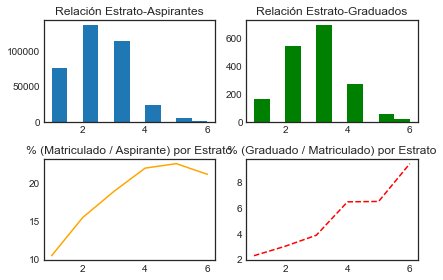

In [10]:
fig, ax = plt.subplots(2,2)
ax[0][0].hist(serieEstratoAspirantes, histtype='stepfilled')
ax[0][1].hist(serieEstratoGraduados, histtype='stepfilled',color="green")
ax[1][0].plot(estratos, relacionMatriculadoAspiranteArray, '-',color="orange")
ax[1][1].plot(estratos, relacionGraduadoMatriculadoArray, '--',color="red")

ax[0][0].set_title('Relación Estrato-Aspirantes')
ax[0][1].set_title('Relación Estrato-Graduados')
ax[1][0].set_title('% (Matriculado / Aspirante) por Estrato')
ax[1][1].set_title('% (Graduado / Matriculado) por Estrato')


plt.tight_layout()

#matriculados vs graduados

# Género aspirantes

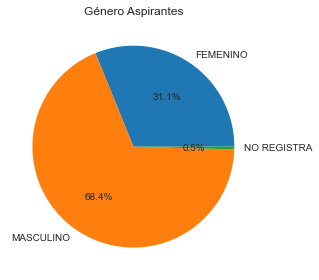

In [11]:
generoAspirantes = misionDB.groupby('GENERO').count()['EDAD']

fig, ax = plt.subplots()
ax.pie(generoAspirantes, labels=generoAspirantes.index, autopct='%.1f%%')
ax.set_title('Género Aspirantes')

plt.tight_layout()
plt.show()

In [12]:
generoAspirantes

GENERO
FEMENINO       109939
MASCULINO      241604
NO REGISTRA      1594
Name: EDAD, dtype: int64

# Algunos datos estadísticos

<BarContainer object of 34 artists>

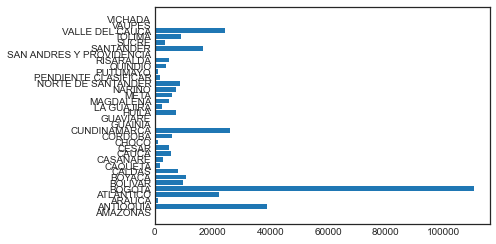

In [13]:
departamentoAspirantes = misionDB.groupby('DEPARTAME_NOMBRE').count()['EDAD']
plt.tight_layout()
plt.barh(departamentoAspirantes.index, departamentoAspirantes)

#https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/

In [15]:
misionDB.describe()

,CONVOCATORIA,ESTRATO_SOCIAL,EDAD,GRADO,META_BENEFICIARIO,INVERSION,META_DINERO
count,353137.0,353137.000000,353137.000000,353137.0,0.0,0.0,0.0
mean,1.0,2.291884,46.954259,-1.0,NaN,NaN,NaN
std,0.0,0.944622,36.247493,0.0,NaN,NaN,NaN
min,1.0,1.000000,0.000000,-1.0,NaN,NaN,NaN
25%,1.0,2.000000,24.000000,-1.0,NaN,NaN,NaN
50%,1.0,2.000000,32.000000,-1.0,NaN,NaN,NaN
75%,1.0,3.000000,46.000000,-1.0,NaN,NaN,NaN
max,1.0,6.000000,121.000000,-1.0,NaN,NaN,NaN
